In [134]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
np.random.seed(3)
tf.random.set_seed(3)

Data_set = np.loadtxt('./ThoraricSurgery.csv', delimiter=',')

X = Data_set[:,0:17]
Y = Data_set[:,17]

In [3]:
model = Sequential()
# 입력 17개 출력 30개 (동그라미 30개)
model.add(Dense(30, input_dim = 17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# epochs = 훈련 수 batch_size = 데이터 조각내서 훈련 (데이터/숫자)
model.fit(X,Y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 0.5582 - accuracy: 0.8213
Epoch 2/100
47/47 [==============================] - 0s 996us/step - loss: 0.4681 - accuracy: 0.8447
Epoch 3/100
47/47 [==============================] - 0s 931us/step - loss: 0.4362 - accuracy: 0.8447
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 933us/step - loss: 0.4482 - accuracy: 0.8511
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8489
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8511
Epoch 10/100
47/47 [==============================] - 0s 913us/step - loss: 0.4311 - accuracy: 0.8532
E

47/47 [==============================] - 0s 1000us/step - loss: 0.4553 - accuracy: 0.8404
Epoch 82/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8489
Epoch 83/100
47/47 [==============================] - 0s 978us/step - loss: 0.4169 - accuracy: 0.8468
Epoch 84/100
47/47 [==============================] - 0s 848us/step - loss: 0.4241 - accuracy: 0.8404
Epoch 85/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4062 - accuracy: 0.8489
Epoch 86/100
47/47 [==============================] - 0s 935us/step - loss: 0.3971 - accuracy: 0.8447
Epoch 87/100
47/47 [==============================] - 0s 986us/step - loss: 0.4162 - accuracy: 0.8362
Epoch 88/100
47/47 [==============================] - 0s 935us/step - loss: 0.3971 - accuracy: 0.8489
Epoch 89/100
47/47 [==============================] - 0s 978us/step - loss: 0.3948 - accuracy: 0.8489
Epoch 90/100
47/47 [==============================] - 0s 869us/step - loss: 0.4222 - accuracy: 0.8

In [5]:
df = pd.read_csv('./pima-indians-diabetes.csv', names = ['pregnant','plasma','pressure',
                                                    'thickness','insulin','BMI','pedigree',
                                                    'age','class'])

In [6]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [7]:
df.info

<bound method DataFrame.info of      pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
..        ...     ...       ...        ...      ...   ...       ...  ...   
763        10     101        76         48      180  32.9     0.171   63   
764         2     122        70         27        0  36.8     0.340   27   
765         5     121        72         23      112  26.2     0.245   30   
766         1     126        60          0        0  30.1     0.349   47   
767         1      93        70         31        0  30.4     0.315   23   

     class  
0        1  
1        0  
2        1  
3  

In [8]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df[['pregnant','class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [10]:
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


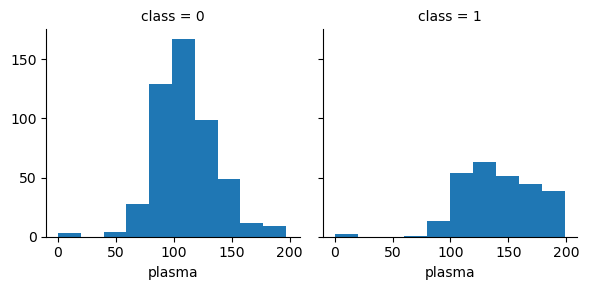

In [13]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [68]:
np.random.seed(3)
tf.random.set_seed(3)

dataset = np.loadtxt('./pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
Y = dataset[:,8]

In [70]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 16.5846 - accuracy: 0.6523
Epoch 2/200
77/77 [==============================] - 0s 990us/step - loss: 2.0059 - accuracy: 0.5573
Epoch 3/200
77/77 [==============================] - 0s 999us/step - loss: 1.2442 - accuracy: 0.5365
Epoch 4/200
77/77 [==============================] - 0s 966us/step - loss: 1.0700 - accuracy: 0.5846
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.9790 - accuracy: 0.5911
Epoch 6/200
77/77 [==============================] - 0s 993us/step - loss: 0.8930 - accuracy: 0.5977
Epoch 7/200
77/77 [==============================] - 0s 930us/step - loss: 0.8371 - accuracy: 0.6328
Epoch 8/200
77/77 [==============================] - 0s 965us/step - loss: 0.8395 - accuracy: 0.6146
Epoch 9/200
77/77 [==============================] - 0s 997us/step - loss: 0.8512 - accuracy: 0.6224
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8249 - accuracy: 0

77/77 [==============================] - 0s 927us/step - loss: 0.5453 - accuracy: 0.7422
Epoch 82/200
77/77 [==============================] - 0s 904us/step - loss: 0.5401 - accuracy: 0.7292
Epoch 83/200
77/77 [==============================] - 0s 944us/step - loss: 0.5661 - accuracy: 0.7318
Epoch 84/200
77/77 [==============================] - 0s 901us/step - loss: 0.5288 - accuracy: 0.7461
Epoch 85/200
77/77 [==============================] - 0s 891us/step - loss: 0.5359 - accuracy: 0.7604
Epoch 86/200
77/77 [==============================] - 0s 943us/step - loss: 0.5261 - accuracy: 0.7461
Epoch 87/200
77/77 [==============================] - 0s 935us/step - loss: 0.5410 - accuracy: 0.7474
Epoch 88/200
77/77 [==============================] - 0s 910us/step - loss: 0.5246 - accuracy: 0.7396
Epoch 89/200
77/77 [==============================] - 0s 966us/step - loss: 0.5309 - accuracy: 0.7422
Epoch 90/200
77/77 [==============================] - 0s 907us/step - loss: 0.5342 - accuracy: 

77/77 [==============================] - 0s 945us/step - loss: 0.4982 - accuracy: 0.7539
Epoch 162/200
77/77 [==============================] - 0s 987us/step - loss: 0.4837 - accuracy: 0.7773
Epoch 163/200
77/77 [==============================] - 0s 947us/step - loss: 0.4892 - accuracy: 0.7930
Epoch 164/200
77/77 [==============================] - 0s 942us/step - loss: 0.6083 - accuracy: 0.7370
Epoch 165/200
77/77 [==============================] - 0s 914us/step - loss: 0.4847 - accuracy: 0.7669
Epoch 166/200
77/77 [==============================] - 0s 917us/step - loss: 0.4897 - accuracy: 0.7695
Epoch 167/200
77/77 [==============================] - 0s 878us/step - loss: 0.4716 - accuracy: 0.7812
Epoch 168/200
77/77 [==============================] - 0s 927us/step - loss: 0.4880 - accuracy: 0.7799
Epoch 169/200
77/77 [==============================] - 0s 957us/step - loss: 0.4785 - accuracy: 0.7799
Epoch 170/200
77/77 [==============================] - 0s 895us/step - loss: 0.4729 - a

In [22]:
print('\n Accuracy : %.4f' %(model.evaluate(X,Y)[1]))

24/24 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8073

 Accuracy : 0.8073


In [72]:
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('./iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species'])
dataset = df.values
X = dataset[:,0:4].astype(float)
Y1 = dataset[:,4]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [80]:
# Y데이터 인코딩
Y1 = Y1.reshape(-1,1)

oh_enc = OneHotEncoder()
oh_enc.fit(Y1)
Y = oh_enc.transform(Y1)

In [76]:
model = Sequential()
model.add(Dense(15, input_dim=3, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('./iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species'])
dataset = df.values
X = dataset[:,0:4].astype(float)
Y1 = dataset[:,4]

In [84]:
e = LabelEncoder()
e.fit(Y1)
Y = e.transform(Y1)
Y_encoded = tf.keras.utils.to_categorical(Y)

In [85]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
model.fit(X,Y_encoded, epochs=50, batch_size=1)

Epoch 1/50
150/150 [==============================] - 0s 912us/step - loss: 1.4507 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 827us/step - loss: 1.1518 - accuracy: 0.3333
Epoch 3/50
150/150 [==============================] - 0s 768us/step - loss: 1.0367 - accuracy: 0.3333
Epoch 4/50
150/150 [==============================] - 0s 772us/step - loss: 0.9337 - accuracy: 0.5200
Epoch 5/50
150/150 [==============================] - 0s 794us/step - loss: 0.8288 - accuracy: 0.6667
Epoch 6/50
150/150 [==============================] - 0s 812us/step - loss: 0.7287 - accuracy: 0.6933
Epoch 7/50
150/150 [==============================] - 0s 797us/step - loss: 0.6456 - accuracy: 0.7333
Epoch 8/50
150/150 [==============================] - 0s 847us/step - loss: 0.5869 - accuracy: 0.7400
Epoch 9/50
150/150 [==============================] - 0s 824us/step - loss: 0.5372 - accuracy: 0.7200
Epoch 10/50
150/150 [==============================] - 0s 777us/step - loss: 0.498

In [87]:
print('\n Accuracy : %.4f' %(model.evaluate(X,Y_encoded)[1]))

5/5 [==============================] - 0s 4ms/step - loss: 0.1006 - accuracy: 0.9667

 Accuracy : 0.9667


In [88]:
df = pd.read_csv('./sonar.csv', header=None)

In [89]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [119]:
np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('./sonar.csv', header=None)
dataset = df.values
X = dataset[:,0:60].astype(float)
Y1 = dataset[:,60]

In [120]:
e = LabelEncoder()
e.fit(Y1)
Y = e.transform(Y1)

In [123]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
model.fit(X,Y, epochs=200, batch_size=5)

Epoch 1/200
42/42 [==============================] - 0s 930us/step - loss: 0.6946 - accuracy: 0.5481
Epoch 2/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.6058
Epoch 3/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.6106
Epoch 4/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6490
Epoch 5/200
42/42 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.6971
Epoch 6/200
42/42 [==============================] - 0s 978us/step - loss: 0.6215 - accuracy: 0.7260
Epoch 7/200
42/42 [==============================] - 0s 942us/step - loss: 0.5947 - accuracy: 0.7596
Epoch 8/200
42/42 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.7548
Epoch 9/200
42/42 [==============================] - 0s 989us/step - loss: 0.5543 - accuracy: 0.7692
Epoch 10/200
42/42 [==============================] - 0s 977us/step - loss: 0.5250 - accuracy: 0.7788

42/42 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9663
Epoch 83/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9760
Epoch 84/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.9663
Epoch 85/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.9663
Epoch 86/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.9712
Epoch 87/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9712
Epoch 88/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9615
Epoch 89/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.9663
Epoch 90/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.9615
Epoch 91/200
42/42 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9663
Epoch 92/200


42/42 [==============================] - 0s 1ms/step - loss: 0.0244 - accuracy: 0.9952
Epoch 164/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0258 - accuracy: 0.9952
Epoch 165/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9952
Epoch 166/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9952
Epoch 167/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9952
Epoch 168/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0197 - accuracy: 0.9952
Epoch 169/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9952
Epoch 170/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9952
Epoch 171/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9952
Epoch 172/200
42/42 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.9952
Epoc

In [125]:
print('\n Accuracy : %.4f' %(model.evaluate(X,Y)[1]))

7/7 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000

 Accuracy : 1.0000


In [129]:
seed = 0
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = []

In [131]:
for train, test in skf.split(X, Y):
    model = Sequential()
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = '%.4f' % (model.evaluate(X[test],Y[test])[1])
    accuracy.append(k_accuracy)
    
print('\n %.f fold accuracy' % n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.4813
Epoch 2/100
38/38 [==============================] - 0s 925us/step - loss: 0.6837 - accuracy: 0.5775
Epoch 3/100
38/38 [==============================] - 0s 921us/step - loss: 0.6777 - accuracy: 0.6096
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.6096
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6738
Epoch 6/100
38/38 [==============================] - 0s 973us/step - loss: 0.6467 - accuracy: 0.6684
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.7166
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.7594
Epoch 9/100
38/38 [==============================] - 0s 980us/step - loss: 0.5311 - accuracy: 0.7540
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.7754
E

38/38 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.9572
Epoch 83/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 0.9626
Epoch 84/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1390 - accuracy: 0.9626
Epoch 85/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9412
Epoch 86/100
38/38 [==============================] - 0s 946us/step - loss: 0.1321 - accuracy: 0.9733
Epoch 87/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1458 - accuracy: 0.9519
Epoch 88/100
38/38 [==============================] - 0s 1000us/step - loss: 0.1376 - accuracy: 0.9679
Epoch 89/100
38/38 [==============================] - 0s 1000us/step - loss: 0.1346 - accuracy: 0.9572
Epoch 90/100
38/38 [==============================] - 0s 908us/step - loss: 0.1283 - accuracy: 0.9679
Epoch 91/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9679
Epo

38/38 [==============================] - 0s 1ms/step - loss: 0.1551 - accuracy: 0.9572
Epoch 63/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.9679
Epoch 64/100
38/38 [==============================] - 0s 1000us/step - loss: 0.1726 - accuracy: 0.9251
Epoch 65/100
38/38 [==============================] - 0s 941us/step - loss: 0.1586 - accuracy: 0.9412
Epoch 66/100
38/38 [==============================] - 0s 999us/step - loss: 0.1378 - accuracy: 0.9572
Epoch 67/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9572
Epoch 68/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.9626
Epoch 69/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.9786
Epoch 70/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9679
Epoch 71/100
38/38 [==============================] - 0s 946us/step - loss: 0.1250 - accuracy: 0.9626
Epoc

38/38 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8930
Epoch 36/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2796 - accuracy: 0.8984
Epoch 37/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.9198
Epoch 38/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.9091
Epoch 39/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.9251
Epoch 40/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2662 - accuracy: 0.9358
Epoch 41/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2547 - accuracy: 0.9144
Epoch 42/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2415 - accuracy: 0.9358
Epoch 43/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2403 - accuracy: 0.9305
Epoch 44/100
38/38 [==============================] - 0s 1000us/step - loss: 0.2355 - accuracy: 0.9305
Epoch 45/1

Epoch 9/100
38/38 [==============================] - 0s 1000us/step - loss: 0.5416 - accuracy: 0.7433
Epoch 10/100
38/38 [==============================] - 0s 983us/step - loss: 0.5248 - accuracy: 0.7807
Epoch 11/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5194 - accuracy: 0.7968
Epoch 12/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.7914
Epoch 13/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7861
Epoch 14/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.8342
Epoch 15/100
38/38 [==============================] - 0s 959us/step - loss: 0.4659 - accuracy: 0.7968
Epoch 16/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7914
Epoch 17/100
38/38 [==============================] - 0s 973us/step - loss: 0.4508 - accuracy: 0.8235
Epoch 18/100
38/38 [==============================] - 0s 962us/step - loss: 0.4422 - accurac

38/38 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 0.9412
Epoch 91/100
38/38 [==============================] - 0s 988us/step - loss: 0.1164 - accuracy: 0.9840
Epoch 92/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9840
Epoch 93/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1135 - accuracy: 0.9786
Epoch 94/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.9733
Epoch 95/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.9679
Epoch 96/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.9893
Epoch 97/100
38/38 [==============================] - 0s 973us/step - loss: 0.1049 - accuracy: 0.9893
Epoch 98/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9733
Epoch 99/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9893
Epoch 100

38/38 [==============================] - 0s 1ms/step - loss: 0.1667 - accuracy: 0.9465
Epoch 71/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1641 - accuracy: 0.9519
Epoch 72/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.9572
Epoch 73/100
38/38 [==============================] - 0s 946us/step - loss: 0.1559 - accuracy: 0.9465
Epoch 74/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1505 - accuracy: 0.9465
Epoch 75/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1519 - accuracy: 0.9626
Epoch 76/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1595 - accuracy: 0.9465
Epoch 77/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9412
Epoch 78/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1463 - accuracy: 0.9412
Epoch 79/100
38/38 [==============================] - 0s 973us/step - loss: 0.1429 - accuracy: 0.9465
Epoch 80/

38/38 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.8877
Epoch 51/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.8984
Epoch 52/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2394 - accuracy: 0.9037
Epoch 53/100
38/38 [==============================] - 0s 1000us/step - loss: 0.2207 - accuracy: 0.9091
Epoch 54/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2194 - accuracy: 0.9251
Epoch 55/100
38/38 [==============================] - 0s 990us/step - loss: 0.2173 - accuracy: 0.9037
Epoch 56/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2203 - accuracy: 0.8984
Epoch 57/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9144
Epoch 58/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.9305
Epoch 59/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9144
Epoch 60

38/38 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8503
Epoch 31/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.8610
Epoch 32/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3139 - accuracy: 0.8610
Epoch 33/100
38/38 [==============================] - 0s 973us/step - loss: 0.3196 - accuracy: 0.8610
Epoch 34/100
38/38 [==============================] - 0s 974us/step - loss: 0.2981 - accuracy: 0.8877
Epoch 35/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.8610
Epoch 36/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2914 - accuracy: 0.8610
Epoch 37/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8717
Epoch 38/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2809 - accuracy: 0.8984
Epoch 39/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.8770
Epoch 40/

Epoch 11/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5253 - accuracy: 0.7433
Epoch 12/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.8075
Epoch 13/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4888 - accuracy: 0.7594
Epoch 14/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.8075
Epoch 15/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8075
Epoch 16/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.7861
Epoch 17/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.8182
Epoch 18/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7968
Epoch 19/100
38/38 [==============================] - 0s 946us/step - loss: 0.4141 - accuracy: 0.8182
Epoch 20/100
38/38 [==============================] - 0s 973us/step - loss: 0.4117 - accuracy: 0.8

38/38 [==============================] - 0s 973us/step - loss: 0.1309 - accuracy: 0.9679
Epoch 93/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.9679
Epoch 94/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.9679
Epoch 95/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1294 - accuracy: 0.9626
Epoch 96/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9626
Epoch 97/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9626
Epoch 98/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1210 - accuracy: 0.9519
Epoch 99/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.9626
Epoch 100/100
1/1 [==============================] - 0s 98ms/step - loss: 0.5741 - accuracy: 0.8095
Epoch 1/100
38/38 [==============================] - 0s 973us/step - loss: 0.7144 - accuracy: 0.4681
Epoch 2/10

38/38 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9894
Epoch 73/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9947
Epoch 74/100
38/38 [==============================] - 0s 1000us/step - loss: 0.0593 - accuracy: 0.9947
Epoch 75/100
38/38 [==============================] - 0s 1000us/step - loss: 0.0680 - accuracy: 0.9894
Epoch 76/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0570 - accuracy: 0.9894
Epoch 77/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0541 - accuracy: 0.9894
Epoch 78/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.9947
Epoch 79/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9894
Epoch 80/100
38/38 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9947
Epoch 81/100
38/38 [==============================] - 0s 974us/step - loss: 0.0451 - accuracy: 1.0000
Epoch

38/38 [==============================] - 0s 1ms/step - loss: 0.2398 - accuracy: 0.9202
Epoch 53/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2345 - accuracy: 0.9149
Epoch 54/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.9202
Epoch 55/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.9043
Epoch 56/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9309
Epoch 57/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9202
Epoch 58/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9043
Epoch 59/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2171 - accuracy: 0.9255
Epoch 60/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2180 - accuracy: 0.9309
Epoch 61/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2100 - accuracy: 0.9202
Epoch 62/100


In [132]:
model.save('my_model.h5')

In [135]:
model = load_model('my_model.h5')